## XGBoost 


### Boosting


* Not a specific machine learning algorithm
* Concept that can be applied to a set of machine learning models
"Meta-algorithm"
* Ensemble meta-algorithm used to convert many weak learners into a strong learner

**weak Learner** - Learners which are slightly better than randomness eg. Decision tree with accuracy greater than 50%

**How boosting works?**

* Iteratively learning a set of weak models on subsets of the data 
* Weighing each weak prediction according to each weak learner's performance
* Combine the weighted predictions to obtain a single weighted prediction

... that is much better than the individual predictions themselves!







What's the difference from Random Forrest?





In [ ]:
#how to install 
#pip install xgboost



In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# load the dataset 
iris = datasets.load_iris()

X,y = iris.data , iris.target

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy:  ", (accuracy))

**When to NOT use XGBoost?**

* Image recognition
* Computer vision
* Natural language processing and understanding problems
* When the number of training samples is significantly smaller than the number of features

### Objective Functions and Base Learners

**Objective Functions**

* Quantifies how far off a prediction is from the actual result
* Measures the difference between estimated and true values for some collection of data
* Goal: Find the model that yields the minimum value of the loss function

#### Common Loss Functions and XGBoost
Loss function names in xgboost:
* **reg:linear** - use for regression problems
* **reg:logistic** - use when you want probability rather than just decision
* **binary:logistic** - use for classification problems when you want just decision, not probability
    

**Base Learners and Why We Need Them?**

* XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
* Individual models = base learners
* Want base learners that when combined create final prediction that is non-linear
* Each base learner should be good at distinguishing or predicting different parts of the dataset
* Two kinds of base learners: **tree** and **linear**

#### Trees as Base Learners in Scikit API

In [ ]:
boston_data = pd.read_csv("../datasets/boston_housing.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1] 
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective='reg:linear',
n_estimators=10, seed=123)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

####  Linear Base Learner in XGBoost API

In [ ]:
boston_data = pd.read_csv("../datasets/boston_housing.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1] 

X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2, random_state=123)
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)
params = {"booster":"gblinear","objective":"reg:linear"}
xg_reg = xgb.train(params = params, dtrain=DM_train,
num_boost_round=10)
preds = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

### Tuning the Model

Why tune? because it gives better accuracy

**Untuned Model**


In [ ]:

housing_data = pd.read_csv("../datasets/ames_housing_trimmed_processed.csv")

X,y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]

housing_dmatrix = xgb.DMatrix(data=X,label=y)

untuned_params = {"objective":"reg:linear"}

tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=untuned_params, nfold=4, num_boost_round=200, metrics="rmse",as_pandas=True, seed=123)

print(type(tuned_cv_results_rmse))

print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

In [ ]:
housing_data = pd.read_csv("../datasets/ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X,label=y)
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5}
tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=4, num_boost_round=200, metrics="rmse",as_pandas=True, seed=123)
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

#### Common tree tunable parameters

* **learning rate:** learning rate/eta
* **gamma:** min loss reduction to create new tree split
* **lambda:** L2 reg on leaf weights
* **alpha:** L1 reg on leaf weights
* **max_depth:** max depth per tree
* **subsample:** % samples used per tree 
* **colsample_bytree:** % features used per tree

## Assignment

1. Load the kidney disease dataset 
2. Try to predict the disease given blood values 

**Main Challenges : Many missing values**

References :

https://xgboost.readthedocs.io/en/latest/model.html
https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

Kidney diseases dataset details :https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

## XGBoost Part 2

Data Preprocessing Step 

We will again look at the AMES housing dataset 



In [2]:
import pandas as pd
df = pd.read_csv('../datasets/ames_unprocessed_data.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Remodeled       1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
Fireplaces      1460 non-null int64
GarageArea      1460 non-null int64
PavedDrive      1460 non-null object
SalePrice       1460 non-null int64
dtypes: float64(1), int64(15), object(5)
memory usage: 239.6+ KB


The data has five categorical columns: MSZoning, PavedDrive, Neighborhood, BldgType, and HouseStyle. Scikit-learn has a LabelEncoder function that converts the values in each categorical column into integers. You'll practice using this here.

In [5]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())
# print()

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In [ ]:
categorical_mask

**We got the categorical columns in one go but is it enough?**



What about the neighbourhood values?

In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

In [9]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
# print(df_encoded[:5, :])
print(pd.DataFrame(df_encoded))

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)


       0    1    2    3    4    5    6    7    8    9     ...      52      53  \
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1710.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1262.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     1.0  1786.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     1.0  1717.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  2198.0   
5     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     1.0  1362.0   
6     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     1.0  1694.0   
7     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  2090.0   
8     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0    ...     1.0  1774.0   
9     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0    ...     1.0  1077.0   
10    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    ...     0.0  1040.0   
11    0.0  0.0  0.0  1.0  0.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

In [100]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")
print(df_dict)

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse="False")

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)


[{'LotArea': 8450, 'Remodeled': 0, 'BsmtHalfBath': 0, 'BsmtFullBath': 1, 'MSSubClass': 60, 'YearBuilt': 2003, 'FullBath': 2, 'HalfBath': 1, 'MSZoning': 'RL', 'LotFrontage': 65.0, 'GrLivArea': 1710, 'PavedDrive': 'Y', 'HouseStyle': '2Story', 'Neighborhood': 'CollgCr', 'BedroomAbvGr': 3, 'Fireplaces': 0, 'OverallQual': 7, 'SalePrice': 208500, 'OverallCond': 5, 'GarageArea': 548, 'BldgType': '1Fam'}, {'LotArea': 9600, 'Remodeled': 0, 'BsmtHalfBath': 1, 'BsmtFullBath': 0, 'MSSubClass': 20, 'YearBuilt': 1976, 'FullBath': 2, 'HalfBath': 0, 'MSZoning': 'RL', 'LotFrontage': 80.0, 'GrLivArea': 1262, 'PavedDrive': 'Y', 'HouseStyle': '1Story', 'Neighborhood': 'Veenker', 'BedroomAbvGr': 3, 'Fireplaces': 1, 'OverallQual': 6, 'SalePrice': 181500, 'OverallCond': 8, 'GarageArea': 460, 'BldgType': '1Fam'}, {'LotArea': 11250, 'Remodeled': 1, 'BsmtHalfBath': 0, 'BsmtFullBath': 1, 'MSSubClass': 60, 'YearBuilt': 2001, 'FullBath': 2, 'HalfBath': 1, 'MSZoning': 'RL', 'LotFrontage': 68.0, 'GrLivArea': 1786, '

### Implementing Pipelines

In [ ]:
df.head()

In [85]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../datasets/ames_unprocessed_data.csv')
df.LotFrontage.fillna(0, inplace=True)

le = LabelEncoder()

# print(df.head())
final_data = df.drop("SalePrice",axis=1)

# Create a boolean mask for categorical columns
categorical_mask = (final_data.dtypes == 'object')

# Get list of categorical column names
categorical_columns = final_data.columns[categorical_mask].tolist()



final_data[categorical_columns] = final_data[categorical_columns].apply(lambda x : le.fit_transform(x))

final_label = df["SalePrice"]


steps = [
    ('ohe',OneHotEncoder(sparse=False, categorical_features=categorical_mask)),
    ('clf',LinearRegression())
]

pipeline = Pipeline(steps)

# not required
# pipeline.fit(final_data, final_label)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, final_data, final_label, cv=5)


print("Accuracy : ",scores.mean())

Accuracy :  0.829474225486


### GridSearchCV

In [97]:
import xgboost as xgb
max_depth = [2,3,4,5,6,7,8,9,10]

params = {
    "objective" : "reg:linear",
}


best_rmse = []
    
datamatrix = xgb.DMatrix(data=final_data, label=final_label)



for depth in max_depth:
    clf = xgb.XGBRegressor()
    params["max_depth"] = depth
    cv_results = xgb.cv( dtrain=datamatrix, params = params, folds=4, num_boost_round = 10, metrics="rmse", seed=123, as_pandas=True)
    print(cv_results)
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
    
#     clf.fit(final_data, final_label)

print(pd.DataFrame(list(zip(max_depth, best_rmse)), columns=["max_depth","best_rmse"]))




/Users/t0mkaka/softwares/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   135286.315104   19962.391698    139626.763021    11028.471888
1   100724.731771   20603.905969    102612.976563     8762.304691
2    76611.032552   19810.735750     77604.184895     7424.373123
3    60542.201823   18982.059593     60747.166667     6505.583586
4    50676.687500   18672.541532     49684.087239     6144.363430
5    44358.804688   17691.687758     42525.825521     5973.275733
6    40826.909505   17293.459163     37954.871745     5790.355883
7    38723.780599   16226.815379     34756.341797     5549.184162
8    37033.497396   14654.688506     32730.009765     5403.016101
9    36224.873047   13763.798766     31104.475261     5189.382470
   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   134778.635417   19965.297537    139022.929687    10775.083356
1    99034.546875   19144.503788    101297.466146     8318.229014
2    75193.171875   19021.895149     75343.348958     6741.683578
3    59280

/Users/t0mkaka/softwares/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   134469.182292   19755.176764    138628.385417    10582.572886
1    98725.630208   18873.532640    100322.361979     7900.386670
2    74521.710937   18596.218654     73560.298177     6086.767911
3    58240.506510   17642.859945     54799.076823     4847.250305
4    47220.596354   17012.969590     41871.515625     4040.985221
5    40817.973959   16113.841294     32818.395182     3489.963696
6    36790.399089   15441.826911     26626.559896     3150.561870
7    34322.645833   14480.581351     22488.332682     2925.290024
8    33007.598307   13404.817705     19700.635417     2703.677139
9    32153.856771   12726.372226     17887.727539     2556.834535
   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   134469.182292   19755.176764    138628.385417    10582.572886
1    98725.630208   18873.532640    100322.361979     7900.386670
2    74521.710937   18596.218654     73560.298177     6086.767911
3    58240

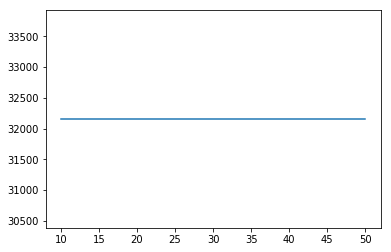

In [96]:
import xgboost as xgb
n_estimator = [10,20,30,40,50]

params = {
    "objective" : "reg:linear",
    "max_depth" :  5
}


best_rmse = []
    
datamatrix = xgb.DMatrix(data=final_data, label=final_label)



for depth in n_estimator:
    clf = xgb.XGBRegressor()
    params["n_estimators"] = depth
    cv_results = xgb.cv( dtrain=datamatrix, params = params, folds=4, num_boost_round = 10, metrics="rmse", seed=123, as_pandas=True)
    print(cv_results)
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
    
#     clf.fit(final_data, final_label)

print(pd.DataFrame(list(zip(n_estimator, best_rmse)), columns=["n_estimator","best_rmse"]))

plt.plot(n_estimator, best_rmse)



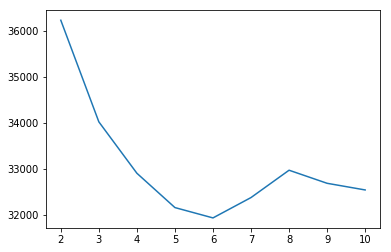

In [89]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(max_depth, best_rmse)

In [95]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

steps2 = [
    
    ('ohe', OneHotEncoder(categorical_features = categorical_mask)),
    ('clf', xgb.XGBRegressor()) 
]

clf_param_grid = {
    'clf__max_depth' : [2,3,4,5,6,7,8,9,10],
    'clf__learning_rate' : [0.1,0.01]
}

# clf_param_grid = {
#     'clf__max_depth' : [2,3,4,5],
#     'clf__learning_rate' : [0.1,0.01],
#     'clf__n_estimators' : [20,30]
# }

xgbclf = Pipeline(steps2)

estimator = GridSearchCV(xgbclf, param_grid=clf_param_grid ,cv =4, verbose=1, scoring="neg_mean_squared_error")
estimator.fit(final_data,final_label)

print(estimator.best_params_)
import numpy as np 
print(np.sqrt(-1*estimator.best_score_))

     

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   17.3s finished


{'clf__learning_rate': 0.1, 'clf__max_depth': 8}
28405.4040327


**Details of Tunable Parameters**

1. **gamma** : the minimum gain which should happen for a split to be made. If the gain is less than value provided then split will not be made. 

2. **alpha** : L1 regularization (concept from Lasso Regression). What it does is penalizes the square of the coefficients of the algo. So some features are which are not important are  gone also. Takes value between 0 and 1. 

3. **lambda** : L2 regularization (Ridge Regression) : Instead of coeeficient squares it works on absolute values so is more stable. 

## Kidney disease dataset 

The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

### Tasks to do 

1. Do cleaning in one step 
2. Try different classifiers and get the best accuracy